<a href="https://colab.research.google.com/github/Snigdha-Gayathri/Data-Mining/blob/main/CatsANDogsDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install unrar if not installed
!apt-get install unrar -y

# Define extraction directory
extraction_dir = "/content/dogs_vs_cats"

# Create extraction directory if it doesn't exist
!mkdir -p "{extraction_dir}"

# Extract the dataset to the specified directory
!unrar x "/content/dogs-vs-cats.rar" "{extraction_dir}"

# List the contents of the extraction directory to verify
!ls "{extraction_dir}"

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os #import os module

# Define dataset directory - now the extraction directory, the place where the dogs and cats folders reside.
dataset_dir = extraction_dir

# Define image size & batch size
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% train, 20% validation
)

# Load training & validation datasets
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Since it's a binary classification (dogs vs cats)
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), strides=(1, 1), padding="same"),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding="same"),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding="same"),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (dog or cat)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/dogs-vs-cats.rar


Would you like to replace the existing file /content/dogs_vs_cats/dogs-vs-cats/cats/240_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg
 24702 bytes, modified on 2024-12-03 06:24
with a new one
 24702 bytes, modified on 2024-12-03 06:24

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step - accuracy: 1.0000 - 

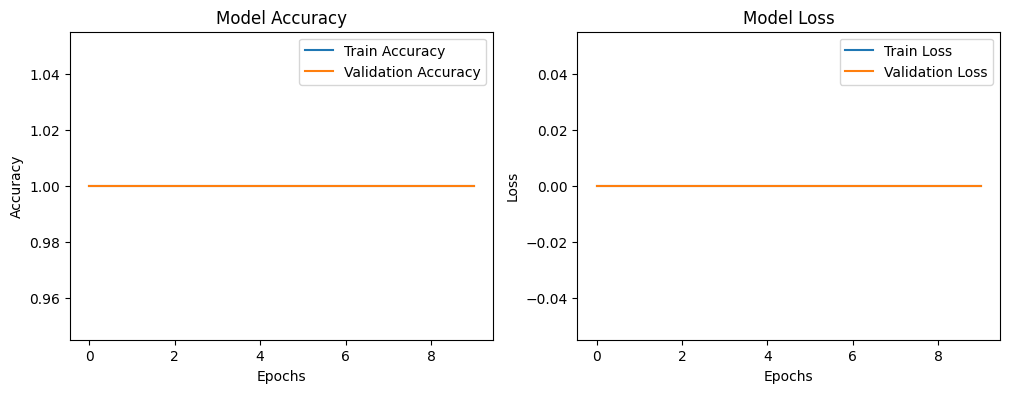

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
The image is a Cat (1.00)


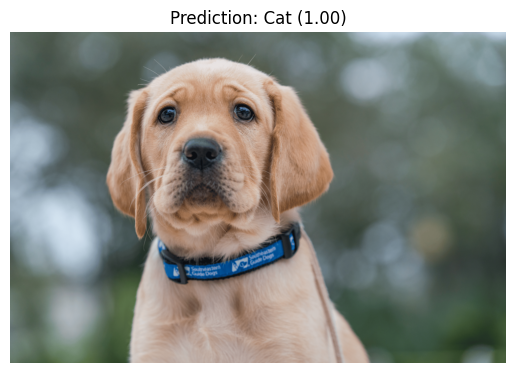

In [16]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

import numpy as np
from tensorflow.keras.preprocessing import image
#import matplotlib.pyplot as plt # Import matplotlib.pyplot, already imported

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0][0]
    if prediction > 0.5:
        label = "Dog"  # Define label
        confidence = prediction  # Define confidence
        print(f"The image is a Dog ({prediction:.2f})")
    else:
        label = "Cat"  # Define label
        confidence = 1 - prediction  # Define confidence
        print(f"The image is a Cat ({1 - prediction:.2f})")
    # Display the image, indented correctly
    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.title(f"Prediction: {label} ({confidence:.2f})")
    plt.show()


predict_image("/content/c529a263-8ffa-4521-a47e-babb146f1e6b.webp")